# Literature Review Survey Processing

In [1]:
import pandas as pd
import re
from collections import Counter
from  itertools import chain

In [62]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

In [2]:
survey_df = pd.read_csv("./data/Copy of Literature Review (Responses) - Form Responses 1.csv")

In [3]:
survey_df.head()

,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,Wild Rodents Used? (like literally caught from the wild),Subject Strain (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black,...,Social Agent Age (check all that apply),Social Agent Sex,Social Agent Housing,Social Agent Rank,Social Agent Type,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?"
0,3/23/2022 15:05:10,Social isolation impairs the persistence of so...,"Almeida-Santos, Ana",2019-01,Amelia Chambers,NaN,yes,Mice,no,Swiss,...,juvenile (3-7 weeks or week not specified),same sex as subject,group-housed,Does not specify,WT (wild type),no,No,"Sex, Strain, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",NaN
1,3/23/2022 15:22:15,Differences in the expression of restricted re...,"Amodeo, Dionsio",2019-06,Amelia Chambers,NaN,yes,Mice,yes,C57BL/6J (control strain) and BTBR,...,does not specify,same sex as subject,does not specify,Does not specify,WT (wild type),yes,Yes,"Sex, Strain, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",NaN
2,3/23/2022 15:37:45,Sex-specific differences in adult cognition an...,"Azogu, Idu",2019-05,Amelia Chambers,NaN,yes,Rats,no,Wistar,...,does not specify,Does not specifiy,does not specify,Does not specify,WT (wild type),yes,Yes,"Type (WT vs transgenic), None","Yes, this one was tricky.",No information about stranger rat that I could...
3,3/30/2022 19:42:12,Sex-specific differences in adult cognition an...,"Azogu, Idu",2019-05,Amelia Chambers,NaN,yes,Rats,no,Wistar,...,does not specify,Does not specifiy,does not specify,Does not specify,WT (wild type),yes,Yes,Strain,"No, I feel confident, and I double-checked all...",NaN
4,3/30/2022 19:59:15,Repeated isoflurane in adult male mice leads t...,"Bajwa, Nikita",2019-02,Amelia Chambers,NaN,yes,Mice,no,C57BL/6J,...,does not specify,always male,does not specify,Does not specify,WT (wild type),yes,Yes,Sex,"No, I feel confident, and I double-checked all...",NaN


# Standarizing all the names

- Capitalizing all the names
    - Python treats all text that have different capitalization as seperate

In [4]:
all_strains = survey_df["Subject Strain  (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black"].unique()

In [5]:
for strain in all_strains:
    print(strain)

Swiss
C57BL/6J (control strain) and BTBR
Wistar
C57BL/6J
(Thy1-APPSweLon) 41Ema (T41)
C57BL/6JOlaHsd; C57BL/6J
PV-Cre; SOM-IRES-Cre
C57B6J 
VGluT3 KO
Sprague Dawley 
Crybb2O377, Crybb2Philly, and Crybb2Aey2 backcrossed with C57BL/6JG
Sprague-Dawley
C57BL/6N
WAG/Rij; Wistar
C57-black6
CD-1
Wistar albino
NLG3 KO backcrossed with C57BL6/J
C57BL/6J; Klk8 KO
Mecp2 KO
KM670/671NL; EphA4flox/flox; Camk2aCre (AD;EphA4-KO)
Sprague Dawley
Shank3 KO
Oxtr-Cre
Sprague Dawley, tgDISC1
CCK-Cre;Dlx5/6-Flpe;RC::FL-hM3Dq
Avpr1b-Cre
Long Evans
C57BL/6J 
C57BL6J
Nrg1 TM HET; C57BL/6 JArc WT control
C57BL/6; BALB/cJ
Klk8 KO; WT control (not specified)
orx-Cre/A53T; A53T; orx-Cre; C57BL/6J
C57Bl6
Wistar 
Long-Evans
C57BL mixed 129/Sv
C57BL/6
C57BL/6;BTBR
Wistar; SHR
Wistar Kyoto More Immobile(WMI); Wistar Kyoto Less Immobile (WLI)
C57BL6/J
C57BL/6NHsd
BALB/c; Wistar; Sprague Dawley
FVB/N
C57BL/6J; C57BL/6 mixed 129/SvEv
129/SvJ mixed C57BL/GJ
Brattleboro; Long-Evans
129sv/ev mixed C57/B6J
C57BL/6J mixed 129

In [6]:
capitalized_all_strains = {strain: strain.upper().strip().encode('ascii', errors='ignore').decode("utf-8")  for strain in all_strains}

In [7]:
capitalized_all_strains

{'Swiss': 'SWISS',
 'C57BL/6J (control strain) and BTBR': 'C57BL/6J (CONTROL STRAIN) AND BTBR',
 'Wistar': 'WISTAR',
 'C57BL/6J': 'C57BL/6J',
 '(Thy1-APPSweLon) 41Ema (T41)': '(THY1-APPSWELON) 41EMA (T41)',
 'C57BL/6JOlaHsd; C57BL/6J': 'C57BL/6JOLAHSD; C57BL/6J',
 'PV-Cre; SOM-IRES-Cre': 'PV-CRE; SOM-IRES-CRE',
 'C57B6J ': 'C57B6J',
 'VGluT3 KO': 'VGLUT3 KO',
 'Sprague Dawley ': 'SPRAGUE DAWLEY',
 'Crybb2O377, Crybb2Philly, and Crybb2Aey2 backcrossed with C57BL/6JG': 'CRYBB2O377, CRYBB2PHILLY, AND CRYBB2AEY2 BACKCROSSED WITH C57BL/6JG',
 'Sprague-Dawley': 'SPRAGUE-DAWLEY',
 'C57BL/6N': 'C57BL/6N',
 'WAG/Rij; Wistar': 'WAG/RIJ; WISTAR',
 'C57-black6': 'C57-BLACK6',
 'CD-1': 'CD-1',
 'Wistar albino': 'WISTAR ALBINO',
 'NLG3 KO backcrossed with C57BL6/J': 'NLG3 KO BACKCROSSED WITH C57BL6/J',
 'C57BL/6J; Klk8 KO': 'C57BL/6J; KLK8 KO',
 'Mecp2 KO': 'MECP2 KO',
 'KM670/671NL; EphA4flox/flox; Camk2aCre (AD;EphA4-KO)': 'KM670/671NL; EPHA4FLOX/FLOX; CAMK2ACRE (AD;EPHA4-KO)',
 'Sprague Dawley': 

- Replacing all commas with semicolons

In [8]:
capitalized_all_strains = {key: value.replace(",", ";") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("-", "") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("/", "") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("WITH", "") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("W/", "") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("RATS", "") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("RAT", "") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("MICE", "") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("SPRAGUE DAWLEY", "SPRAGUE_DAWLEY") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("SPRAGUEDAWLEY", "SPRAGUE_DAWLEY") for key, value in capitalized_all_strains.items()}


- All the different subjects should have a semicolon `;` seperating them.
    - So we will use this to identify multiple subjects

In [9]:
seperated_all_strains = {key: value.split(";") for key, value in capitalized_all_strains.items()}

In [10]:
seperated_all_strains

{'Swiss': ['SWISS'],
 'C57BL/6J (control strain) and BTBR': ['C57BL6J (CONTROL STRAIN) AND BTBR'],
 'Wistar': ['WISTAR'],
 'C57BL/6J': ['C57BL6J'],
 '(Thy1-APPSweLon) 41Ema (T41)': ['(THY1APPSWELON) 41EMA (T41)'],
 'C57BL/6JOlaHsd; C57BL/6J': ['C57BL6JOLAHSD', ' C57BL6J'],
 'PV-Cre; SOM-IRES-Cre': ['PVCRE', ' SOMIRESCRE'],
 'C57B6J ': ['C57B6J'],
 'VGluT3 KO': ['VGLUT3 KO'],
 'Sprague Dawley ': ['SPRAGUE_DAWLEY'],
 'Crybb2O377, Crybb2Philly, and Crybb2Aey2 backcrossed with C57BL/6JG': ['CRYBB2O377',
  ' CRYBB2PHILLY',
  ' AND CRYBB2AEY2 BACKCROSSED  C57BL6JG'],
 'Sprague-Dawley': ['SPRAGUE_DAWLEY'],
 'C57BL/6N': ['C57BL6N'],
 'WAG/Rij; Wistar': ['WAGRIJ', ' WISTAR'],
 'C57-black6': ['C57BLACK6'],
 'CD-1': ['CD1'],
 'Wistar albino': ['WISTAR ALBINO'],
 'NLG3 KO backcrossed with C57BL6/J': ['NLG3 KO BACKCROSSED  C57BL6J'],
 'C57BL/6J; Klk8 KO': ['C57BL6J', ' KLK8 KO'],
 'Mecp2 KO': ['MECP2 KO'],
 'KM670/671NL; EphA4flox/flox; Camk2aCre (AD;EphA4-KO)': ['KM670671NL',
  ' EPHA4FLOXFLOX',
 

- All the mixed mice should have the word "MIXED" in them so we will use that to identify the different strains

In [11]:
seperated_all_strains

{'Swiss': ['SWISS'],
 'C57BL/6J (control strain) and BTBR': ['C57BL6J (CONTROL STRAIN) AND BTBR'],
 'Wistar': ['WISTAR'],
 'C57BL/6J': ['C57BL6J'],
 '(Thy1-APPSweLon) 41Ema (T41)': ['(THY1APPSWELON) 41EMA (T41)'],
 'C57BL/6JOlaHsd; C57BL/6J': ['C57BL6JOLAHSD', ' C57BL6J'],
 'PV-Cre; SOM-IRES-Cre': ['PVCRE', ' SOMIRESCRE'],
 'C57B6J ': ['C57B6J'],
 'VGluT3 KO': ['VGLUT3 KO'],
 'Sprague Dawley ': ['SPRAGUE_DAWLEY'],
 'Crybb2O377, Crybb2Philly, and Crybb2Aey2 backcrossed with C57BL/6JG': ['CRYBB2O377',
  ' CRYBB2PHILLY',
  ' AND CRYBB2AEY2 BACKCROSSED  C57BL6JG'],
 'Sprague-Dawley': ['SPRAGUE_DAWLEY'],
 'C57BL/6N': ['C57BL6N'],
 'WAG/Rij; Wistar': ['WAGRIJ', ' WISTAR'],
 'C57-black6': ['C57BLACK6'],
 'CD-1': ['CD1'],
 'Wistar albino': ['WISTAR ALBINO'],
 'NLG3 KO backcrossed with C57BL6/J': ['NLG3 KO BACKCROSSED  C57BL6J'],
 'C57BL/6J; Klk8 KO': ['C57BL6J', ' KLK8 KO'],
 'Mecp2 KO': ['MECP2 KO'],
 'KM670/671NL; EphA4flox/flox; Camk2aCre (AD;EphA4-KO)': ['KM670671NL',
  ' EPHA4FLOXFLOX',
 

In [12]:
# Listing out all strains in a paper regardless of it was mixed or not
listing_all_strains = {}
# Seperating all the strains that were not in the same subject
subject_seperated_strains = {}

for key, value in seperated_all_strains.items():
    
    all_strains_for_paper = []
    all_subjects_for_paper = []
    
    for mixed_strain in value:
#         all_strains = [strain.strip() for strain in mixed_strain.split("MIXED")] 
        all_strains = [strain.strip().replace("  ", "_").replace(" ", "_") for strain in re.split(" X |MIXED|BACKCROSSED|AND|&", mixed_strain) if len(strain) >= 2]   
        all_strains_for_paper.extend(all_strains)
        all_subjects_for_paper.append(" mixed ".join(sorted(all_strains)))
        
    listing_all_strains[key] = all_strains_for_paper
    subject_seperated_strains[key] = all_subjects_for_paper

In [13]:
listing_all_strains

{'Swiss': ['SWISS'],
 'C57BL/6J (control strain) and BTBR': ['C57BL6J_(CONTROL_STRAIN)', 'BTBR'],
 'Wistar': ['WISTAR'],
 'C57BL/6J': ['C57BL6J'],
 '(Thy1-APPSweLon) 41Ema (T41)': ['(THY1APPSWELON)_41EMA_(T41)'],
 'C57BL/6JOlaHsd; C57BL/6J': ['C57BL6JOLAHSD', 'C57BL6J'],
 'PV-Cre; SOM-IRES-Cre': ['PVCRE', 'SOMIRESCRE'],
 'C57B6J ': ['C57B6J'],
 'VGluT3 KO': ['VGLUT3_KO'],
 'Sprague Dawley ': ['SPRAGUE_DAWLEY'],
 'Crybb2O377, Crybb2Philly, and Crybb2Aey2 backcrossed with C57BL/6JG': ['CRYBB2O377',
  'CRYBB2PHILLY',
  'CRYBB2AEY2',
  'C57BL6JG'],
 'Sprague-Dawley': ['SPRAGUE_DAWLEY'],
 'C57BL/6N': ['C57BL6N'],
 'WAG/Rij; Wistar': ['WAGRIJ', 'WISTAR'],
 'C57-black6': ['C57BLACK6'],
 'CD-1': ['CD1'],
 'Wistar albino': ['WISTAR_ALBINO'],
 'NLG3 KO backcrossed with C57BL6/J': ['NLG3_KO', 'C57BL6J'],
 'C57BL/6J; Klk8 KO': ['C57BL6J', 'KLK8_KO'],
 'Mecp2 KO': ['MECP2_KO'],
 'KM670/671NL; EphA4flox/flox; Camk2aCre (AD;EphA4-KO)': ['KM670671NL',
  'EPHA4FLOXFLOX',
  'CAMK2ACRE_(AD',
  'EPHA4KO)'

In [14]:
subject_seperated_strains

{'Swiss': ['SWISS'],
 'C57BL/6J (control strain) and BTBR': ['BTBR mixed C57BL6J_(CONTROL_STRAIN)'],
 'Wistar': ['WISTAR'],
 'C57BL/6J': ['C57BL6J'],
 '(Thy1-APPSweLon) 41Ema (T41)': ['(THY1APPSWELON)_41EMA_(T41)'],
 'C57BL/6JOlaHsd; C57BL/6J': ['C57BL6JOLAHSD', 'C57BL6J'],
 'PV-Cre; SOM-IRES-Cre': ['PVCRE', 'SOMIRESCRE'],
 'C57B6J ': ['C57B6J'],
 'VGluT3 KO': ['VGLUT3_KO'],
 'Sprague Dawley ': ['SPRAGUE_DAWLEY'],
 'Crybb2O377, Crybb2Philly, and Crybb2Aey2 backcrossed with C57BL/6JG': ['CRYBB2O377',
  'CRYBB2PHILLY',
  'C57BL6JG mixed CRYBB2AEY2'],
 'Sprague-Dawley': ['SPRAGUE_DAWLEY'],
 'C57BL/6N': ['C57BL6N'],
 'WAG/Rij; Wistar': ['WAGRIJ', 'WISTAR'],
 'C57-black6': ['C57BLACK6'],
 'CD-1': ['CD1'],
 'Wistar albino': ['WISTAR_ALBINO'],
 'NLG3 KO backcrossed with C57BL6/J': ['C57BL6J mixed NLG3_KO'],
 'C57BL/6J; Klk8 KO': ['C57BL6J', 'KLK8_KO'],
 'Mecp2 KO': ['MECP2_KO'],
 'KM670/671NL; EphA4flox/flox; Camk2aCre (AD;EphA4-KO)': ['KM670671NL',
  'EPHA4FLOXFLOX',
  'CAMK2ACRE_(AD',
  'EP

In [15]:
survey_df["all_processed_strains"] = survey_df["Subject Strain  (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black"].map(listing_all_strains)
survey_df["per_subject_processed_strains"] = survey_df["Subject Strain  (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black"].map(subject_seperated_strains)

In [16]:
survey_df

,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,Wild Rodents Used? (like literally caught from the wild),Subject Strain (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black,...,Social Agent Housing,Social Agent Rank,Social Agent Type,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",all_processed_strains,per_subject_processed_strains
0,3/23/2022 15:05:10,Social isolation impairs the persistence of so...,"Almeida-Santos, Ana",2019-01,Amelia Chambers,NaN,yes,Mice,no,Swiss,...,group-housed,Does not specify,WT (wild type),no,No,"Sex, Strain, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",NaN,[SWISS],[SWISS]
1,3/23/2022 15:22:15,Differences in the expression of restricted re...,"Amodeo, Dionsio",2019-06,Amelia Chambers,NaN,yes,Mice,yes,C57BL/6J (control strain) and BTBR,...,does not specify,Does not specify,WT (wild type),yes,Yes,"Sex, Strain, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",NaN,"[C57BL6J_(CONTROL_STRAIN), BTBR]",[BTBR mixed C57BL6J_(CONTROL_STRAIN)]
2,3/23/2022 15:37:45,Sex-specific differences in adult cognition an...,"Azogu, Idu",2019-05,Amelia Chambers,NaN,yes,Rats,no,Wistar,...,does not specify,Does not specify,WT (wild type),yes,Yes,"Type (WT vs transgenic), None","Yes, this one was tricky.",No information about stranger rat that I could...,[WISTAR],[WISTAR]
3,3/30/2022 19:42:12,Sex-specific differences in adult cognition an...,"Azogu, Idu",2019-05,Amelia Chambers,NaN,yes,Rats,no,Wistar,...,does not specify,Does not specify,WT (wild type),yes,Yes,Strain,"No, I feel confident, and I double-checked all...",NaN,[WISTAR],[WISTAR]
4,3/30/2022 19:59:15,Repeated isoflurane in adult male mice leads t...,"Bajwa, Nikita",2019-02,Amelia Chambers,NaN,yes,Mice,no,C57BL/6J,...,does not specify,Does not specify,WT (wild type),yes,Yes,Sex,"No, I feel confident, and I double-checked all...",NaN,[C57BL6J],[C57BL6J]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,6/15/2022 13:35:52,Modulation of the storage of social recognitio...,"Cavalcante, Lorena",2017-09,Ryo Iwata,"Leo, good",yes,Rats,no,Wistar,...,group-housed,Does not specify,WT (wild type),yes,Yes,"Sex, Strain, Housing History, Type (WT vs tran...","No, I feel confident, and I double-checked all...",NaN,[WISTAR],[WISTAR]
648,6/15/2022 14:05:16,Mice with genetic deletion of the heparin-bind...,"Prediger, Rui",2011-02,Ryo Iwata,NaN,yes,Mice,no,C57BL/6,...,group-housed,Does not specify,WT (wild type),no,No,"Strain, Housing History","No, I feel confident, and I double-checked all...",NaN,[C57BL6],[C57BL6]
649,6/15/2022 14:58:37,Sex-Specific Cognitive Deficits and Regional B...,"Lan, Wen-Chun",2011-07,Ryo Iwata,NaN,yes,Mice,no,C57BL/6,...,singly-housed,Does not specify,WT (wild type),no,Yes,"Strain, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",NaN,[C57BL6],[C57BL6]
650,6/15/2022 15:06:24,Differential Immediate and Sustained Memory En...,"Thomsen, Morten",2011-11,Ryo Iwata,NaN,yes,Rats,no,Wistar,...,does not specify,Does not specify,WT (wild type),yes,Yes,"Sex, Strain, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",NaN,[WISTAR],[WISTAR]


In [17]:
all_listed_strain_counts_df = pd.Series(Counter(chain(*survey_df["all_processed_strains"]))).sort_index().rename_axis('Strain').reset_index(name='Counts')

In [18]:
all_listed_strain_counts_df.sort_values("Counts", ascending=False).head(n=25)

,Strain,Counts
42,C57BL6J,154
128,WISTAR,142
119,SPRAGUE_DAWLEY,79
39,C57BL6,76
66,CD1,29
53,C57BL6N,23
120,SWISS,19
16,129SVJ,10
10,129SV,9
97,LONGEVANS,8


In [19]:
per_subject_strain_counts_df = pd.Series(Counter(chain(*survey_df["per_subject_processed_strains"]))).sort_index().rename_axis('Strain').reset_index(name='Counts')

In [20]:
per_subject_strain_counts_df.sort_values("Counts", ascending=False).head(n=25)

,Strain,Counts
142,WISTAR,141
63,C57BL6J,134
135,SPRAGUE_DAWLEY,79
60,C57BL6,68
86,CD1,29
77,C57BL6N,20
136,SWISS,19
115,LONGEVANS,8
94,DOES_NOT_SPECIFY,8
121,NOT_SPECIFIED,7


- Checking why different amounts of "C57BL6J"
    - So there is less in `per_subject_strain_counts_df` because some of the "C57BL6J" are in a mixed group. But if you look at the total, it's all the same

In [21]:
all_listed_strain_counts_df[all_listed_strain_counts_df["Strain"].str.contains("C57BL6J")].sort_values("Counts", ascending=False).head()

,Strain,Counts
42,C57BL6J,154
48,C57BL6JOLAHSD,6
44,C57BL6JC57BL6N129S6,2
49,C57BL6JRJ,2
4,129C57BL6J,1


In [22]:
per_subject_strain_counts_df[per_subject_strain_counts_df["Strain"].str.contains("C57BL6J")].sort_values("Counts", ascending=False).head()

,Strain,Counts
63,C57BL6J,134
73,C57BL6JOLAHSD,6
55,C3HHEJ mixed C57BL6J,4
64,C57BL6J mixed C57BL6N,2
69,C57BL6JC57BL6N129S6,2


In [23]:
all_listed_strain_counts_df[all_listed_strain_counts_df["Strain"].str.contains("C57BL6J")]["Counts"].sum()

176

In [24]:
per_subject_strain_counts_df[per_subject_strain_counts_df["Strain"].str.contains("C57BL6J")]["Counts"].sum()

176

- Options
    - A list of tuples
    - A list of strings
    - https://stackoverflow.com/questions/50731229/split-cell-into-multiple-rows-in-pandas-dataframe
        - Split list into rows and into strings
        - Or just split all the strains into rows

- Creating a row for each subject

In [25]:
all_processed_strains_df = survey_df.explode("all_processed_strains").reset_index()
per_subject_processed_strains_df = survey_df.explode("per_subject_processed_strains").reset_index()

- Getting a list of strains with the highest counts

In [26]:
all_listed_strain_counts_df.sort_values("Counts", ascending=False).head(n=11)

,Strain,Counts
42,C57BL6J,154
128,WISTAR,142
119,SPRAGUE_DAWLEY,79
39,C57BL6,76
66,CD1,29
53,C57BL6N,23
120,SWISS,19
16,129SVJ,10
10,129SV,9
97,LONGEVANS,8


In [32]:
most_common_strains = list(all_listed_strain_counts_df.sort_values("Counts", ascending=False).head(n=10)["Strain"])

In [33]:
most_common_strains

['C57BL6J',
 'WISTAR',
 'SPRAGUE_DAWLEY',
 'C57BL6',
 'CD1',
 'C57BL6N',
 'SWISS',
 '129SVJ',
 '129SV',
 'LONGEVANS']

- Grouping everything by year

In [38]:
from datetime import datetime

In [50]:
all_processed_strains_df["publication_year"] = all_processed_strains_df["Publication Date (YYYY-MM)"].apply(lambda x: x.split("-")[0])

In [52]:
all_processed_strains_df.head()

,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,Wild Rodents Used? (like literally caught from the wild),...,Social Agent Rank,Social Agent Type,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",all_processed_strains,per_subject_processed_strains,publication_year
0,0,3/23/2022 15:05:10,Social isolation impairs the persistence of so...,"Almeida-Santos, Ana",2019-01,Amelia Chambers,NaN,yes,Mice,no,...,Does not specify,WT (wild type),no,No,"Sex, Strain, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",NaN,SWISS,[SWISS],2019
1,1,3/23/2022 15:22:15,Differences in the expression of restricted re...,"Amodeo, Dionsio",2019-06,Amelia Chambers,NaN,yes,Mice,yes,...,Does not specify,WT (wild type),yes,Yes,"Sex, Strain, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",NaN,C57BL6J_(CONTROL_STRAIN),[BTBR mixed C57BL6J_(CONTROL_STRAIN)],2019
2,1,3/23/2022 15:22:15,Differences in the expression of restricted re...,"Amodeo, Dionsio",2019-06,Amelia Chambers,NaN,yes,Mice,yes,...,Does not specify,WT (wild type),yes,Yes,"Sex, Strain, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",NaN,BTBR,[BTBR mixed C57BL6J_(CONTROL_STRAIN)],2019
3,2,3/23/2022 15:37:45,Sex-specific differences in adult cognition an...,"Azogu, Idu",2019-05,Amelia Chambers,NaN,yes,Rats,no,...,Does not specify,WT (wild type),yes,Yes,"Type (WT vs transgenic), None","Yes, this one was tricky.",No information about stranger rat that I could...,WISTAR,[WISTAR],2019
4,3,3/30/2022 19:42:12,Sex-specific differences in adult cognition an...,"Azogu, Idu",2019-05,Amelia Chambers,NaN,yes,Rats,no,...,Does not specify,WT (wild type),yes,Yes,Strain,"No, I feel confident, and I double-checked all...",NaN,WISTAR,[WISTAR],2019


In [67]:
strain_year_count = all_processed_strains_df.groupby(['publication_year','all_processed_strains'], as_index=False).count()
strain_year_count["publication_year"] = strain_year_count["publication_year"].astype(int)

In [68]:
strain_year_count.head()

,publication_year,all_processed_strains,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",...,Social Agent Sex,Social Agent Housing,Social Agent Rank,Social Agent Type,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",per_subject_processed_strains
0,2000,C57BL6J,2,2,2,2,2,2,0,2,...,2,2,2,2,2,2,2,2,0,2
1,2000,SPRAGUE_DAWLEY,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,0,1
2,2000,WISTAR,2,2,2,2,2,2,0,2,...,2,2,2,2,2,2,2,2,0,2
3,2001,129SVEV,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
4,2001,C57BL6J,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1


In [69]:
from matplotlib import pyplot as plt


Text(0, 0.5, 'Number of papers')

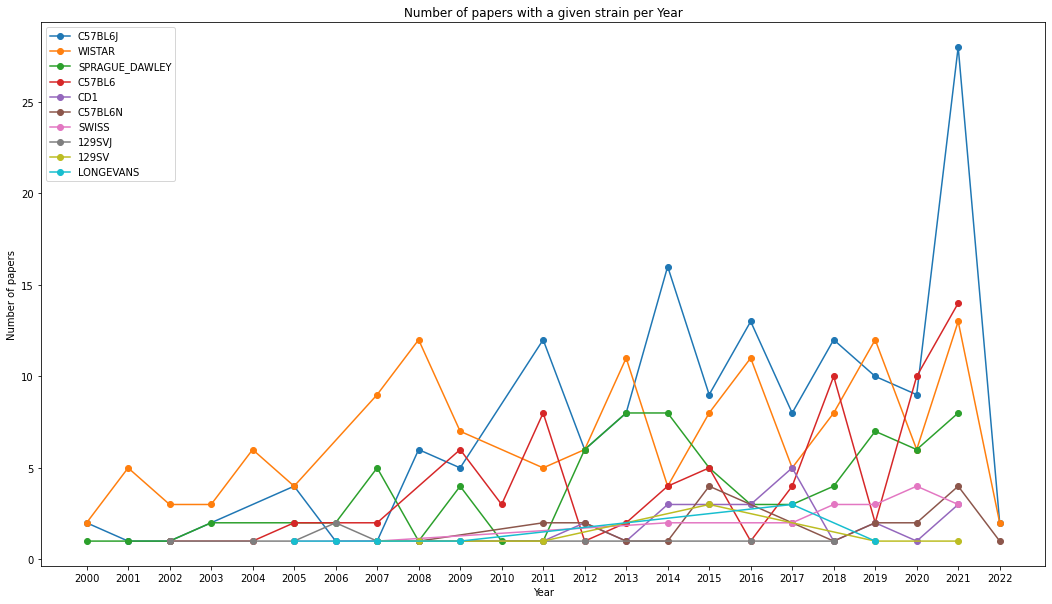

In [75]:
fig, ax = plt.subplots()

for strain in most_common_strains:
    strain_df = strain_year_count[strain_year_count["all_processed_strains"] == strain]
    ax.plot(strain_df["publication_year"], strain_df["index"], '-o', label=strain)
plt.legend()
plt.xticks(strain_year_count["publication_year"].unique())
plt.title("Number of papers with a given strain per Year")
plt.xlabel("Year")
plt.ylabel("Number of papers")

In [37]:
all_processed_strains_df["Publication Date (YYYY-MM)"][0]

'2019-01'

In [28]:
all_processed_mask = all_processed_strains_df.groupby(["all_processed_strains"]).count() >= 2

In [29]:
survey_df[all_processed_mask]

,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,Wild Rodents Used? (like literally caught from the wild),Subject Strain (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black,...,Social Agent Housing,Social Agent Rank,Social Agent Type,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",all_processed_strains,per_subject_processed_strains
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

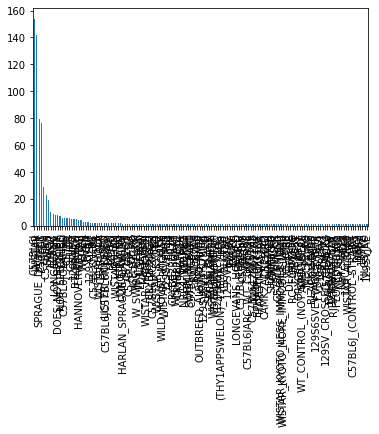

In [30]:
all_processed_strains_df['all_processed_strains'].value_counts().plot(kind='bar')

In [31]:
all_processed_strains_df.groupby("all_processed_strains").count()

,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,Wild Rodents Used? (like literally caught from the wild),...,Social Agent Sex,Social Agent Housing,Social Agent Rank,Social Agent Type,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",per_subject_processed_strains
all_processed_strains,,,,,,,,,,,,,,,,,,,,,
(THY1APPSWELON)_41EMA_(T41),1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,0,1
126SV,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,0,1
129,2,2,2,2,2,2,0,2,2,2,...,2,2,2,2,2,2,2,2,0,2
129C57BL6,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,0,1
129C57BL6J,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WT_CONTROL_(NOT_SPECIFIED),1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,0,1
WYSTAR_KYOTO,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,0,1
W_C57BL6J,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,0,1,0,0,1


- Make a column for each sex and age